                                Titanic Dataset Analysis

# Data Acquisition

In [104]:
import pandas as pd;
from pandas import Series, DataFrame

In [105]:
#Import Titanic train dataset csv file in a DataFrame
train_df=pd.read_csv('train.csv')

In [106]:
#Preview the train data
train_df.head()
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [107]:
#Import test titanic dataset csv file as DataFrame
test_df=pd.read_csv('test.csv')

In [108]:
#Preview the test data
test_df.head()
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Exploratory Data Analysis

In [109]:
#import required libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

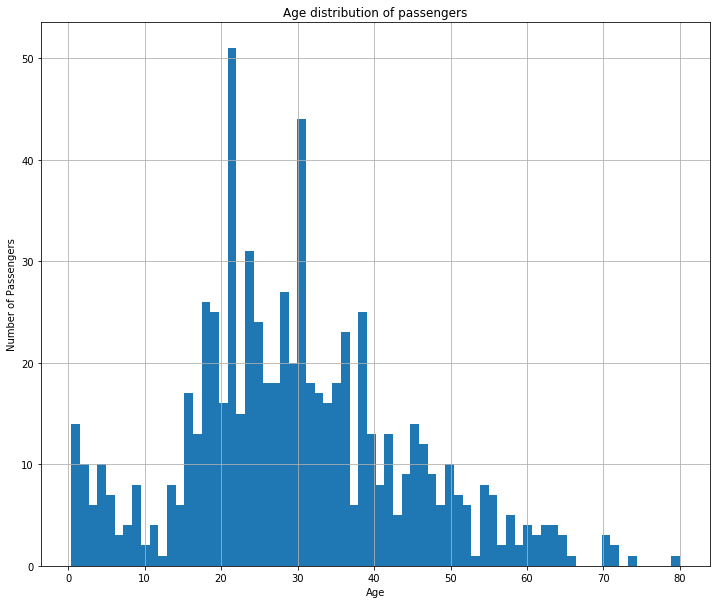

In [110]:
#First explore data for passengers age distribution
plt.figure(figsize=(12,10))
train_df['Age'].hist(bins=70)
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

Text(0.5,1,'Survival by Age (1=Survived)')

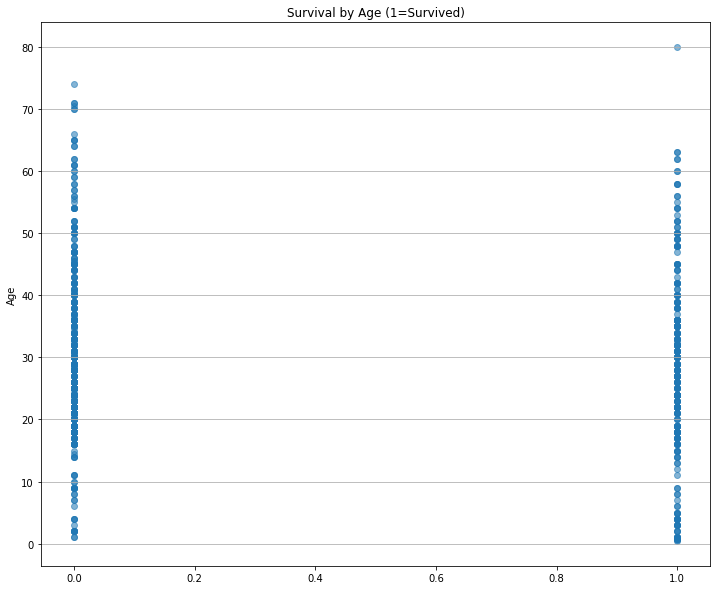

In [111]:
#Explore data for passengers survival by age
plt.figure(figsize=(12,10))
plt.scatter(train_df.Survived,train_df.Age, alpha=0.55)
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age (1=Survived)")

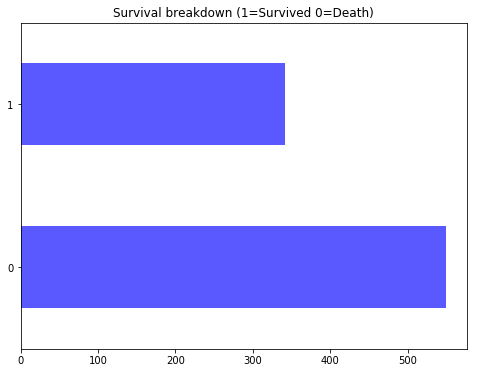

In [112]:
#Explore data for passengers Survival breakdown
plt.figure(figsize=(8,6))
train_df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
plt.title('Survival breakdown (1=Survived 0=Death)')
plt.show()

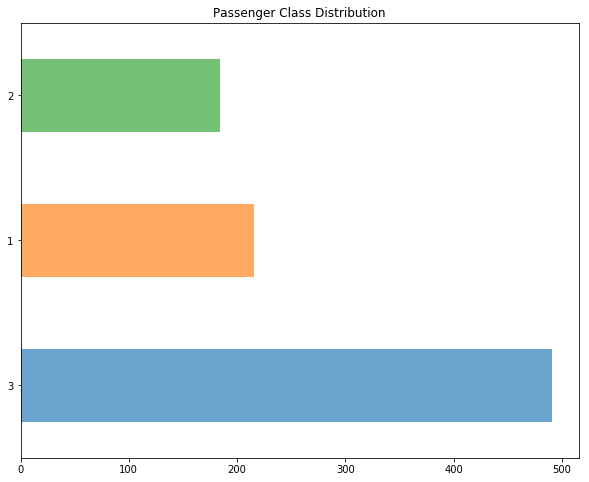

In [113]:
#Explore data for passenger class distribution
plt.figure(figsize=(10,8))
train_df.Pclass.value_counts().plot(kind='barh',alpha=0.66)
plt.title('Passenger Class Distribution')
plt.show()

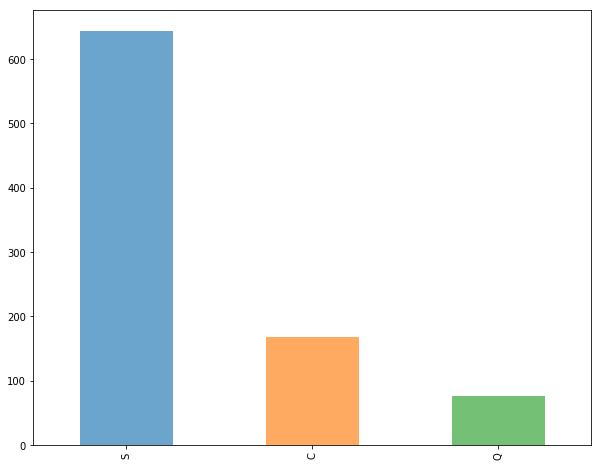

In [114]:
#Explore data for passenger embarkment by location
plt.figure(figsize=(10,8))
train_df.Embarked.value_counts().plot(kind='bar',alpha=0.66)
plt.show()

# Machine Learning

In [115]:
#Create a function to load train data file
def load_titanic_train_file():
    titanic_train_df=pd.read_csv('train.csv')
    cols=["Pclass","Sex","Age"]
    #Change male to 1 and female to 0
    titanic_train_df["Sex"]=titanic_train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handling missing values of age
    titanic_train_df["Age"]=titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean())
    titanic_train_df["Fare"]=titanic_train_df["Fare"].fillna(titanic_train_df['Fare'].mean())
    Survived=titanic_train_df['Survived'].values
    data=titanic_train_df[cols].values
    return Survived,data


In [116]:
#Create a function to load test data file
def load_titanic_test_file():
    titanic_test_df=pd.read_csv('test.csv')
    cols=["Pclass","Sex","Age"]
    #Change male to 1 and female to 0
    titanic_test_df["Sex"]=titanic_test_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handling missing values of age
    titanic_test_df["Age"]=titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean())
    titanic_test_df["Fare"]=titanic_test_df["Fare"].fillna(titanic_test_df['Fare'].mean())
    data=titanic_test_df[cols].values
    return data


In [117]:
#Now create dataset for machine learning
survived,data_train=load_titanic_train_file()
data_test=load_titanic_test_file()

# Machine Learning: Model Training

In [118]:
#import the logistic regression model for machine learning
from sklearn.linear_model import LogisticRegression
#Create model(estimator)
model=LogisticRegression()

In [119]:
#Fit the data into model
model.fit(data_train,survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
#Predict the test data with the model
predict=model.predict(data_test)

In [121]:
#View the Predicted Values
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
#create new test dataset for prediction and testing
new_test_prediction_set=[[1,1,22],[3,0,26],[1,0,38]]

In [125]:
model.predict(new_test_prediction_set)

array([0, 1, 1], dtype=int64)

# Machine Learning: Model Persistence

In [126]:
#import library for model persistence
import pickle as pkl

In [127]:
#use dumps method to persist the model
persist_model=pkl.dumps(model)

In [128]:
#view the persisted model
persist_model

"ccopy_reg\n_reconstructor\np0\n(csklearn.linear_model.logistic\nLogisticRegression\np1\nc__builtin__\nobject\np2\nNtp3\nRp4\n(dp5\nS'warm_start'\np6\nI00\nsS'C'\np7\nF1.0\nsS'n_jobs'\np8\nI1\nsS'verbose'\np9\nI0\nsS'fit_intercept'\np10\nI01\nsS'solver'\np11\nS'liblinear'\np12\nsS'classes_'\np13\ncnumpy.core.multiarray\n_reconstruct\np14\n(cnumpy\nndarray\np15\n(I0\ntp16\nS'b'\np17\ntp18\nRp19\n(I1\n(L2L\ntp20\ncnumpy\ndtype\np21\n(S'i8'\np22\nI0\nI1\ntp23\nRp24\n(I3\nS'<'\np25\nNNNI-1\nI-1\nI0\ntp26\nbI00\nS'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00'\np27\ntp28\nbsS'n_iter_'\np29\ng14\n(g15\n(I0\ntp30\ng17\ntp31\nRp32\n(I1\n(L1L\ntp33\ng21\n(S'i4'\np34\nI0\nI1\ntp35\nRp36\n(I3\nS'<'\np37\nNNNI-1\nI-1\nI0\ntp38\nbI00\nS'\\x0c\\x00\\x00\\x00'\np39\ntp40\nbsS'intercept_scaling'\np41\nI1\nsS'penalty'\np42\nS'l2'\np43\nsS'multi_class'\np44\nS'ovr'\np45\nsS'random_state'\np46\nNsS'_sklearn_version'\np47\nS'0.19.1'\np48\nsS'dual'\np49\nI00\nsS'tol'\np50

In [129]:
#Use joblib to persist the model to a file
from sklearn.externals import joblib
joblib.dump(model,'regmodel.pkl')

['regmodel.pkl']

In [130]:
#now create the named model from the saved model
new_model=joblib.load('regmodel.pkl')

In [131]:
#View the new model
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
#use new model to predict the test dataset outcome
new_model.predict(new_test_prediction_set)

array([0, 1, 1], dtype=int64)